<a href="https://colab.research.google.com/github/WMinerva292/WMinerva292/blob/main/17thSept_KMeansHS_Dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>

# **KMeans Case Study**

<hr>

**K-Means clustering is the most popular unsupervised machine learning algorithm. K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. In this kernel, I implement K-Means clustering to find intrinsic groups within the dataset that display the same behaviour.**

**Link to the dataset: https://drive.google.com/file/d/1zUKxZ2AdfZNJz0Z1P2D4mTQ1euKSzF8Z/view?usp=sharing**

<hr>

# **Step 1 - Importing Libraries**

**Configuration Libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

**Classical Machine Learning Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Machine Learning Libraries**

In [ ]:
from sklearn.metrics import *
from sklearn.cluster import KMeans

<hr>

# **Step 2 - Data Loading and Inspection Phase**

#### **Data Loading**

In [ ]:
df = pd.read_csv("Cricket.csv", encoding = "latin-1")

#### **Data Inspection**

In [ ]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


* **Insights**
  * **The `HS` this needs to be worked on, since there is ambiguuity with this columns**
  * **WE can use this `span` column for finding the total experience that the player might have**

#### **Data Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


# **Step 3 - Data Preprocessing**

#### **Working with the `span` column**

In [ ]:
df["Span"].head()

,Span
0,1989-2012
1,2000-2015
2,1995-2012
3,1989-2011
4,1998-2015


In [ ]:
df[["Start_Year", "End_Year"]] = df["Span"].str.split("-", expand = True)

In [ ]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start_Year,End_Year
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015


In [ ]:
df["Start_Year"].dtype

dtype('O')

In [ ]:
df[["Start_Year", "End_Year"]] = df[["Start_Year", "End_Year"]].astype(int)

In [ ]:
df["Start_Year"].dtype

dtype('int64')

**Working on creating a new feature that is experience (Feature Engineering -> Feature Construction)**

In [ ]:
df["Year_of_Playing"] = df["End_Year"] - df["Start_Year"]

**Removal of the columns**

In [ ]:
df = df.drop(["Start_Year", "End_Year"], axis = 1)

**INspect**

In [ ]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Year_of_Playing
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [ ]:
df = df.drop("Span", axis = 1)

In [ ]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Year_of_Playing
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


#### **Working with `HS` columns**

In [ ]:
df["HS"].value_counts()

,count
HS,
119*,3
145,3
120*,3
131*,3
169,2
...,...
124,1
134*,1
130,1


**Creating a new data having only the HS columns**

In [ ]:
df2 = df["HS"]

In [ ]:
df2.to_string()

'0     200*\n1      169\n2      164\n3      189\n4      144\n5     137*\n6      139\n7      183\n8      153\n9      169\n10    161*\n11    141*\n12     172\n13    183*\n14    153*\n15    162*\n16     145\n17     215\n18     194\n19     150\n20     150\n21    152*\n22    132*\n23     173\n24     219\n25     183\n26     175\n27     124\n28    134*\n29     130\n30    120*\n31    131*\n32    119*\n33     144\n34     159\n35     102\n36    145*\n37     141\n38    108*\n39    188*\n40     145\n41     143\n42    189*\n43    142*\n44    139*\n45    127*\n46    131*\n47     122\n48    174*\n49    181*\n50     166\n51     145\n52     122\n53     121\n54    140*\n55    119*\n56    120*\n57    124*\n58    113*\n59    185*\n60     154\n61    116*\n62     112\n63    237*\n64    109*\n65     264\n66     141\n67     119\n68    144*\n69    145*\n70    150*\n71    131*\n72    133*\n73    119*\n74    133*\n75     96*\n76    120*\n77     156\n78     112'

In [ ]:
df[["HS", "Extra"]] = df["HS"].str.split("*", expand = True)

In [ ]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Year_of_Playing,Extra
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,None
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,None
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,None
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,None


In [ ]:
df["HS"] = df["HS"].astype("int")

In [ ]:
df.drop("Extra", axis = 1, inplace =True)

In [ ]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Year_of_Playing
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


#### **Null check**

In [ ]:
df.isnull().sum()

,0
Player,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Ave,0
BF,0
SR,0
100,0


#### **Duplicates**

In [ ]:
df.duplicated().sum()

0

**Recheck the data for the confirmation**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           79 non-null     object 
 1   Mat              79 non-null     int64  
 2   Inns             79 non-null     int64  
 3   NO               79 non-null     int64  
 4   Runs             79 non-null     int64  
 5   HS               79 non-null     int64  
 6   Ave              79 non-null     float64
 7   BF               79 non-null     int64  
 8   SR               79 non-null     float64
 9   100              79 non-null     int64  
 10  50               79 non-null     int64  
 11  0                79 non-null     int64  
 12  Year_of_Playing  79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


<hr>

# **Step 4- Model Building Phase**

**1. Make the copy of the data**

In [ ]:
df_copy = df.copy()

**Remove the player name, since the names are unique and they might not be very helpful in clustering. Hence, we will eliminate them for now and then once the data is clustered properly, we will concatnate them**

In [ ]:
df_copy = df_copy.drop("Player", axis = 1)

<hr>

#### **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_copy.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Year_of_Playing
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [ ]:
scaler = StandardScaler()

In [ ]:
df_scaled = scaler.fit_transform(df_copy)

In [ ]:
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [ ]:
pd.DataFrame(df_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900
...,...,...,...,...,...,...,...,...,...,...,...,...
74,-1.587674,-1.481860,-1.188961,-0.979677,-0.522838,1.106299,-0.559768,-1.457604,-0.069268,-0.950465,-1.741328,0.684919
75,-1.126598,-1.167010,0.067133,-0.984410,-1.713068,0.829159,-0.863213,-0.562275,-1.437319,-0.273453,-1.231828,-0.227024
76,-0.651961,-0.709047,0.485831,-0.996241,-0.941027,-0.537836,-0.967512,-0.234765,-0.815478,-1.258197,-1.061995,-1.138967
77,-0.638400,-0.995274,0.206699,-0.997819,0.217035,0.208570,-1.317278,1.332823,-0.691110,-1.012011,0.296671,-0.834986


<hr>

#### **Implementation**

  * **Using Elbow Method, we can find the optimal number of clusters**

In [ ]:
# Find the best number of clusters

# Step 1 : Set the range (2, 8)
clusters = list(range(2, 8))

In [ ]:
# Define a list to capture all the WCSS values
wcss = []

In [ ]:
# Start the process
# Starting the for loop
for x in clusters:
  # Initialize the model with "x" clusters
  model = KMeans(n_clusters = x)
  # Fit the data into the model
  model.fit(df_scaled)
  # Capture the WCSS
  wcss.append(model.inertia_)
  # Print
  print(f"The model having {x} clusters is having WCSS: {model.inertia_}")

The model having 2 clusters is having WCSS: 644.840516217269
The model having 3 clusters is having WCSS: 531.4535214769
The model having 4 clusters is having WCSS: 463.5785544582662
The model having 5 clusters is having WCSS: 411.5104562761523
The model having 6 clusters is having WCSS: 378.2536606293572
The model having 7 clusters is having WCSS: 348.3772350938933


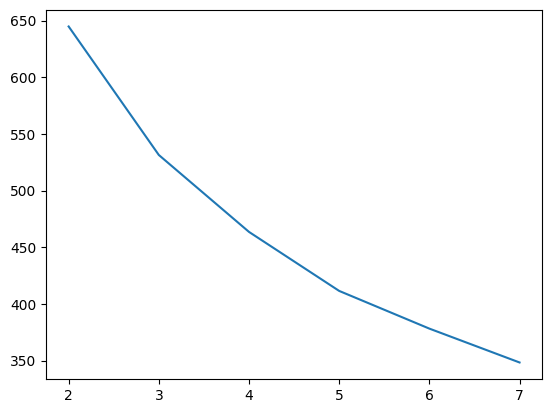

In [ ]:
plt.plot(clusters, wcss)

### **Silhouette Analysis**

In [ ]:
# Find the best number of clusters

# Step 1 : Set the range (2, 8)
clusters = list(range(2, 8))

In [ ]:
# Define a list to capture all the sillhouette values
scoreList = []

In [ ]:
# Start the process
# Starting the for loop
for x in clusters:
  # Initialize the model with "x" clusters
  model = KMeans(n_clusters = x)
  # Fit the data into the model
  model.fit(df_scaled)
  # Calculate the lable of cluster
  cluster_label = model.labels_
  # Capture the WCSS
  score = silhouette_score(df_scaled, cluster_label)
  scoreList.append(score)
  # Print
  print(f"The model having {x} clusters is having score: {score}")

The model having 2 clusters is having score: 0.3136820966012298
The model having 3 clusters is having score: 0.21336526403477102
The model having 4 clusters is having score: 0.20417775518159367
The model having 5 clusters is having score: 0.1772280565366602
The model having 6 clusters is having score: 0.17877267346054976
The model having 7 clusters is having score: 0.18172262632475766


**A high Silhouette score means that the data points are close to the average distance of its clusters, and far from the nearest clusters, that mean if we are close to our own cluster and far from the rest cluster, can we say that we have done a good clustering**

<hr>

# **Model Building**

In [ ]:
model = KMeans(n_clusters = 3)

In [ ]:
model.fit(df_scaled)

KMeans(n_clusters=3)

In [ ]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [ ]:
df["Cluster_Assigned"] = model.labels_

In [ ]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Year_of_Playing,Cluster_Assigned
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,0
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,0
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,0
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,0
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,0


In [ ]:
df.tail()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Year_of_Playing,Cluster_Assigned
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,1
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13,1
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10,1
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11,1
78,Abdul Razzaq (Asia/PAK),265,228,57,5080,112,29.70,6252,81.25,3,23,14,15,2


In [ ]:
a = "2013-2020"

In [ ]:
a.split("-")

['2013', '2020']